# 📈 Covid19 Data Analysis


## 1. Importing Necessary Libraries

In [28]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import folium

## 2. Loading the Dataset

In [29]:
corona_dataset_csv = pd.read_csv("Covid19_Dataset/covid19_Confirmed_dataset.csv")

In [30]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [31]:
happiness_report_csv = pd.read_csv("Covid19_Dataset/worldwide_happiness_report.csv")

In [32]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 3. Data Cleaning and Preprocessing

### 3.1: Cleaning COVID-19 Data

##### 3.1.1 Handling Missing Values

In [33]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


##### 3.1.2 Aggregating Data by Country

In [34]:
corona_dataset_csv.drop(["Province/State"], axis=1, inplace=True) 

In [35]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum()

In [36]:
corona_dataset_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


##### 3.1.3: Computing Maximum Infection Rate

In [37]:
countries = list(corona_dataset_aggregated.index)
max_infection_rate = []
for c in countries :
    max_infection_rate.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rate

In [38]:
corona_dataset_aggregated.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0000
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0000
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0000
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0000
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,29.0766


In [39]:
corona_data = corona_dataset_aggregated[["Lat", "Long", "max_infection_rate"]].copy()

In [40]:
corona_data.head()

,Lat,Long,max_infection_rate
Country/Region,,,
Afghanistan,33.0000,65.0000,232.0000
Albania,41.1533,20.1683,34.0000
Algeria,28.0339,1.6596,199.0000
Andorra,42.5063,1.5218,43.0000
Angola,-11.2027,17.8739,29.0766


### 3.2: Cleaning GDP data 

##### 3.2.1 Selecting Key Economic Features

In [41]:
happiness_report_csv = pd.read_csv("Covid19_Dataset/worldwide_happiness_report.csv")

In [42]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [43]:
useless_cols = ["Overall rank","Score", "Generosity", "Perceptions of corruption"]

In [44]:
happiness_report_csv.drop(useless_cols, axis=1, inplace=True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


##### 3.2.1: Setting Country as Index

In [45]:
happiness_report_csv.rename(columns={"Country or region": "Country/Region"}, inplace=True)
happiness_report_csv.set_index('Country/Region', inplace=True)

happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country/Region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [46]:
gdp_data = pd.DataFrame(happiness_report_csv["GDP per capita"])

In [47]:
gdp_data.head()

,GDP per capita
Country/Region,
Finland,1.340
Denmark,1.383
Norway,1.488
Iceland,1.380
Netherlands,1.396


# 4. Data visualization

### 4.1 Integrating Infection Rates with GDP Data 

In [48]:
corona_data.head()

,Lat,Long,max_infection_rate
Country/Region,,,
Afghanistan,33.0000,65.0000,232.0000
Albania,41.1533,20.1683,34.0000
Algeria,28.0339,1.6596,199.0000
Andorra,42.5063,1.5218,43.0000
Angola,-11.2027,17.8739,29.0766


In [49]:
corona_data.shape

(187, 3)

In [50]:
gdp_data.head()

,GDP per capita
Country/Region,
Finland,1.340
Denmark,1.383
Norway,1.488
Iceland,1.380
Netherlands,1.396


In [51]:
gdp_data.shape

(156, 1)

In [52]:
data = corona_data.join(gdp_data, how="inner")
data.head()

,Lat,Long,max_infection_rate,GDP per capita
Country/Region,,,,
Afghanistan,33.0000,65.0000,232.0,0.350
Albania,41.1533,20.1683,34.0,0.947
Algeria,28.0339,1.6596,199.0,1.002
Argentina,-38.4161,-63.6167,291.0,1.092
Armenia,40.0691,45.0382,134.0,0.850


### 4.2 Geographical Distribution of COVID-19 Infection Rates and GDP

In [53]:
import folium
from folium.plugins import MarkerCluster

world_map = folium.Map(location=[20, 0], zoom_start=2)
marker_cluster = MarkerCluster().add_to(world_map)

for index, row in data.iterrows():
    folium.CircleMarker(
        location=[row["Lat"], row["Long"]],
        radius=np.log1p(row["max_infection_rate"]) * 5,  # 对数缩放
        color="red" if row["GDP per capita"] > 1 else "blue",
        fill=True,
        fill_color="red" if row["GDP per capita"] > 1 else "blue",
        fill_opacity=0.6,
        popup=f"Country: {index}<br>Max Infection Rate: {row['max_infection_rate']}<br>GDP per Capita: {row['GDP per capita']}",
    ).add_to(marker_cluster)

world_map



### 4.3 Correlation Between GDP and COVID-19 Infection Rates


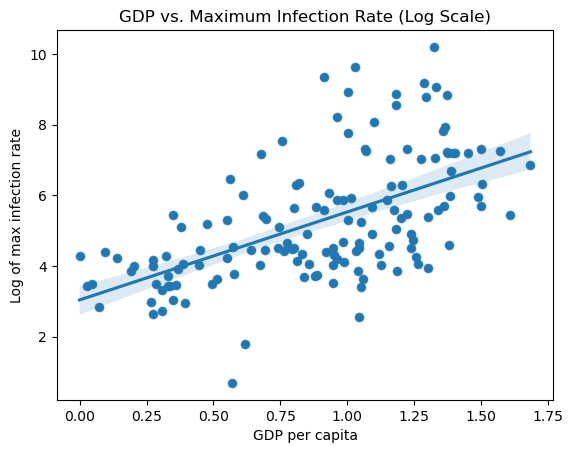

In [54]:
x = np.array(data["GDP per capita"])
y = np.array(data["max_infection_rate"])

sns.scatterplot(x=x, y=np.log(y)) 
sns.regplot(x=x, y=np.log(y))

plt.xlabel("GDP per capita")  
plt.ylabel("Log of max infection rate") 
plt.title("GDP vs. Maximum Infection Rate (Log Scale)") 
plt.show()

## 5. Conclusions

#### 1. Higher GDP countries tend to report more COVID-19 cases
- Our correlation analysis indicates a positive relationship between GDP per capita and the maximum infection rate.
- This could be due to higher testing capacity, greater international mobility, and higher population density in wealthier nations.

#### 2.  Lower GDP countries may have underreported cases
- Many low-GDP countries show low reported infection rates, which might not reflect the true situation.
- Possible reasons include limited healthcare infrastructure, low testing capacity, and government data transparency issues.
- This suggests that raw case numbers alone may not fully capture the true spread of COVID-19.

#### 3. GDP is not the sole determining factor of infection rates
- Countries with similar GDP levels can have different infection rates, likely due to varying containment strategies and public health interventions.
- While GDP correlates with infection rates, other key factors such as government policies, population density, and healthcare systems may have stronger effects.

#### 4. Geographical patterns suggest regional differences
- The geospatial visualization highlights that wealthier countries in North America, Europe, and East Asia tend to have higher reported cases.
- Some lower-GDP regions, such as parts of Africa and South Asia, show fewer reported infections, possibly due to data limitations rather than lower actual cases.

#### 5. Future research directions
- Compare countries with similar GDP levels but significantly different infection rates to identify key contributing factors.
- Incorporate additional key factors such as population density, urbanization rates, healthcare capacity, and government policies to examine their impact on COVID-19 infection rates.
- Investigate temporal trends by examining longitudinal data to see whether GDP changes over time influence the spread and containment of COVID-19.
